In [14]:
# Initial imports
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import seaborn as sns
import matplotlib.pyplot as plt


In [15]:
# Load the dataset
df = pd.read_csv('part 1 ETL Workflow/working.csv')
df.head()


,product,RetailPrice,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,g_sum,other_carbs,...,boxcox_reconstructed_energy,transformed_reconstructed_energy,boxcox_g_sum,transformed_g_sum,cluster,category,certainty,alternative_cluster,alternative_category,anomaly
0,Artichoke,2.4703,314.0,6.67,3.33,1.67,1.67,0.76200,12.0,1.66,...,-0.263470,-1.033042,-0.290163,-1.195525,4,creams & dips,1.0000,6,strange cluster 6,0
1,Asparagus,2.9531,222.0,3.53,3.53,1.18,2.35,0.14986,10.0,2.35,...,-0.416842,-1.207215,-0.381893,-1.241809,4,creams & dips,0.6441,18,tomato sauce,0
2,Beets,1.1431,167.0,0.00,10.00,2.00,2.00,0.12700,12.0,8.00,...,-0.458748,-1.254806,-0.290163,-1.195525,18,tomato sauce,0.9965,1,beans & peas,0
3,Broccoli,2.3458,121.0,0.00,4.71,2.35,3.53,0.07366,8.0,2.36,...,-0.562940,-1.373130,-0.470604,-1.286569,18,tomato sauce,1.0000,8,yoghurt and milk,0
4,Carrots,1.1979,159.0,0.00,8.97,6.41,1.28,0.19558,10.0,2.56,...,-0.506612,-1.309162,-0.381893,-1.241809,18,tomato sauce,0.9999,8,yoghurt and milk,0


In [34]:
df.describe()

,RetailPrice,energy_100g,fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,g_sum,other_carbs,reconstructed_energy,...,boxcox_energy_100g,transformed_energy_100g,boxcox_reconstructed_energy,transformed_reconstructed_energy,boxcox_g_sum,transformed_g_sum,cluster,certainty,alternative_cluster,anomaly
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,...,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,7.008865,1092.753333,12.034583,33.537167,18.053167,5.016167,0.905182,51.500000,15.484000,1100.686250,...,0.610795,-0.039228,0.618011,-0.032001,2.029978,-0.024871,11.366667,0.981177,8.525000,0.083333
std,5.963671,842.249156,20.271819,31.581298,22.409652,6.860325,1.662319,34.656538,21.150891,843.558476,...,0.963959,1.100758,0.960668,1.090969,2.065835,1.042341,6.173858,0.078712,5.342021,0.277544
min,0.382000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.813555,-1.665713,-0.813555,-1.657737,-0.780754,-1.443058,0.000000,0.527500,1.000000,0.000000
25%,2.391075,225.000000,0.000000,6.670000,1.975000,0.000000,0.014350,14.000000,0.575000,240.847500,...,-0.424755,-1.221737,-0.400837,-1.189041,-0.195765,-1.147896,6.000000,0.999500,6.000000,0.000000
50%,6.023761,1194.500000,1.725000,16.470000,9.000000,2.350000,0.186690,53.000000,4.880000,1172.650000,...,0.821992,0.201941,0.794629,0.168573,1.972328,-0.053959,12.000000,1.000000,6.000000,0.000000
75%,9.552561,1572.250000,17.175000,63.315000,29.102500,6.702500,1.197255,86.500000,22.532500,1620.927500,...,1.226996,0.664422,1.273399,0.712281,4.131671,1.035562,17.000000,1.000000,12.000000,0.000000
max,37.341726,3404.000000,93.300000,92.860000,89.290000,26.900000,11.430000,98.000000,77.790000,3452.100000,...,2.916923,2.594174,2.950581,2.616948,4.915540,1.431072,19.000000,1.000000,19.000000,1.000000


In [16]:
df.columns

Index(['product', 'RetailPrice', 'energy_100g', 'fat_100g',
       'carbohydrates_100g', 'sugars_100g', 'proteins_100g', 'salt_100g',
       'g_sum', 'other_carbs', 'reconstructed_energy',
       'boxcox_carbohydrates_100g', 'transformed_carbohydrates_100g',
       'boxcox_fat_100g', 'transformed_fat_100g', 'boxcox_proteins_100g',
       'transformed_proteins_100g', 'boxcox_sugars_100g',
       'transformed_sugars_100g', 'boxcox_other_carbs',
       'transformed_other_carbs', 'boxcox_salt_100g', 'transformed_salt_100g',
       'boxcox_energy_100g', 'transformed_energy_100g',
       'boxcox_reconstructed_energy', 'transformed_reconstructed_energy',
       'boxcox_g_sum', 'transformed_g_sum', 'cluster', 'category', 'certainty',
       'alternative_cluster', 'alternative_category', 'anomaly'],
      dtype='object')

In [35]:
#essential columns
features = ["transformed_carbohydrates_100g",
            "transformed_fat_100g",
            "transformed_proteins_100g",
            "transformed_sugars_100g",
            "transformed_salt_100g",
            "transformed_other_carbs",
            "transformed_energy_100g",
            "transformed_reconstructed_energy",
            "transformed_g_sum"]

#make new data frame with only selected features and price


df_essentials = df[features + ['RetailPrice']]

# Heatmap

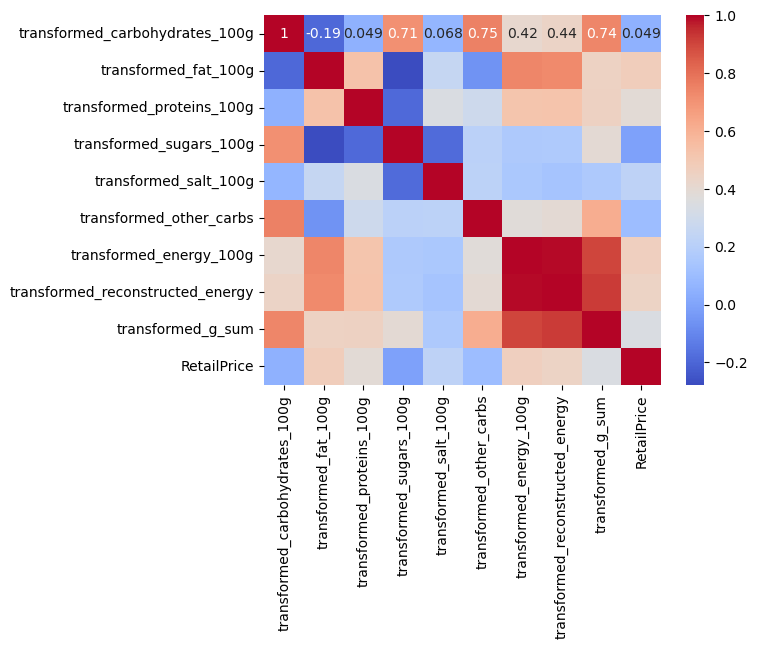

In [37]:
sns.heatmap(df_essentials.corr(), annot=True, cmap='coolwarm')
plt.show()

	1.	High Correlations:
	•	transformed_energy_100g and transformed_reconstructed_energy show a strong positive correlation. This suggests that they likely represent similar or overlapping information, which might explain their high VIF values.
	•	transformed_g_sum also correlates strongly with both transformed_energy_100g and transformed_reconstructed_energy.
	2.	Moderate Correlations:
	•	transformed_carbohydrates_100g has a moderate correlation with transformed_sugars_100g and transformed_other_carbs, which makes sense since sugars are part of carbohydrates.
	•	transformed_sugars_100g has a moderate to strong correlation with several variables, including transformed_fat_100g and transformed_other_carbs.
	3.	RetailPrice:
	•	RetailPrice has fairly low correlations with most features, indicating that it may not be heavily dependent on any single feature or that there’s some complex interaction not captured by simple correlations.

# Multicullinearity 

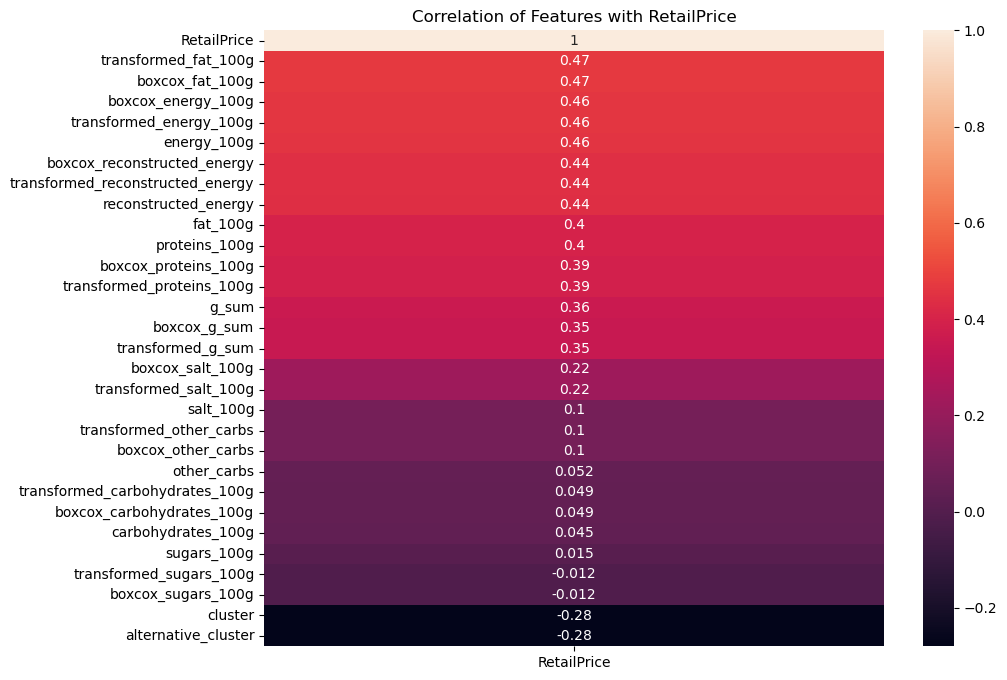

In [24]:
#drop all categorical columns

df_price_col = df.drop(columns=['product', 'category', 'alternative_category', 'certainty', 'anomaly'])

# Correlation matrix
corr_matrix = df_price_col.corr()


# Visualize correlations with the target (RetailPrice)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['RetailPrice']].sort_values(by='RetailPrice', ascending=False), annot=True)
plt.title('Correlation of Features with RetailPrice')
plt.show()

In [30]:
features = ["transformed_carbohydrates_100g",
            "transformed_fat_100g",
            "transformed_proteins_100g",
            "transformed_sugars_100g",
            "transformed_salt_100g",
            "transformed_other_carbs",
            "transformed_energy_100g",
            "transformed_reconstructed_energy",
            "transformed_g_sum"]

#make new data frame with only selected features and price


df_price_by_transformed = df_price_col[features + ['RetailPrice']]

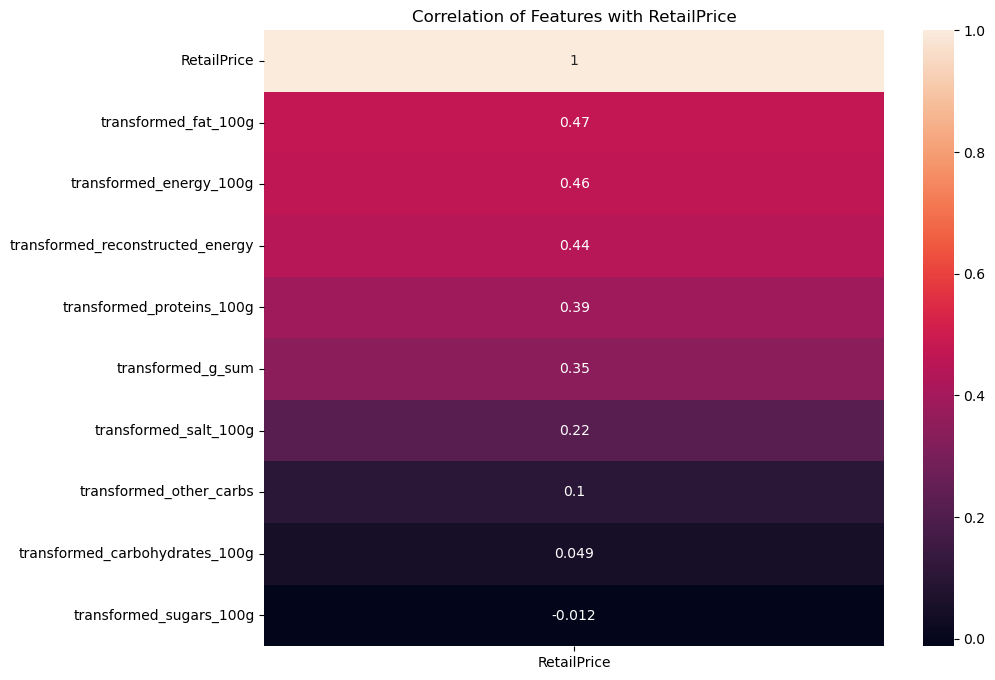

In [31]:
# Correlation matrix by transformed features

corr_matrix = df_price_by_transformed.corr()


# Visualize correlations with the target (RetailPrice)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['RetailPrice']].sort_values(by='RetailPrice', ascending=False), annot=True)
plt.title('Correlation of Features with RetailPrice')
plt.show()

In [33]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only the numeric features for VIF calculation
#numeric_features = df_cleaned.drop(columns=['RetailPrice', 'product', 'category', 'alternative_category', 'cluster', 'alternative_cluster', 'anomaly'])

# Add a constant to the features matrix for the VIF calculation
variance_IF = df_price_by_transformed.assign(constant=1)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = variance_IF.columns
vif['VIF'] = [variance_inflation_factor(variance_IF.values, i) for i in range(variance_IF.shape[1])]

# Show the VIF values
print(vif)

                             Feature         VIF
0     transformed_carbohydrates_100g   37.802384
1               transformed_fat_100g    9.720371
2          transformed_proteins_100g    2.478799
3            transformed_sugars_100g    4.578585
4              transformed_salt_100g    1.763848
5            transformed_other_carbs    5.254370
6            transformed_energy_100g   96.710340
7   transformed_reconstructed_energy  233.090224
8                  transformed_g_sum  135.950987
9                        RetailPrice    1.438911
10                          constant    3.628371


	•	transformed_energy_100g (VIF = 96.71)
	•	transformed_reconstructed_energy (VIF = 233.09)
	•	transformed_g_sum (VIF = 135.95)
	•	transformed_carbohydrates_100g (VIF = 37.80)

FROM online

https://www.kaggle.com/code/allunia/hidden-treasures-in-our-groceries

In [ ]:

nutrition_table_cols = ["energy_100g",
                        "fat_100g",
                        "carbohydrates_100g",
                        "sugars_100g",
                        "proteins_100g",
                        "salt_100g"]

In [ ]:
nutrition_table, test_table = train_test_split(nutrition_table, test_size=0.3, random_state=0)

In [ ]:
features = ["transformed_carbohydrates_100g",
            "transformed_fat_100g",
            "transformed_proteins_100g",
            "transformed_sugars_100g",
            "transformed_salt_100g",
            "transformed_other_carbs",
            "transformed_energy_100g",
            "transformed_reconstructed_energy",
            "transformed_g_sum"]

In [ ]:
X_train = nutrition_table[features].values
X_test = test_table[features].values